In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Dataset 1 (T1.csv)

In [40]:
df = pd.read_csv('/content/gdrive/Shareddrives/Computational Intelligence/T1.csv')

In [41]:
df=df.rename(columns={"LV ActivePower (kW)": "ActivePower","Wind Speed (m/s)":"Wind Speed","Theoretical_Power_Curve (KWh)":"Theoretical_Power_Curve","Wind Direction (°)":"Wind Direction"})
df.head()

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [42]:
df.shape

(50530, 5)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date/Time                50530 non-null  object 
 1   ActivePower              50530 non-null  float64
 2   Wind Speed               50530 non-null  float64
 3   Theoretical_Power_Curve  50530 non-null  float64
 4   Wind Direction           50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [44]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.head()

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [45]:
df.isna().sum()

Date/Time                  0
ActivePower                0
Wind Speed                 0
Theoretical_Power_Curve    0
Wind Direction             0
dtype: int64

## Remove unused data

In [46]:
power_0=df[df['Wind Speed']==0]
len(power_0)

10

In [47]:
df=df.drop(df[df['Wind Speed']==0].index)
df

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [48]:
Theoretical_0=df[df['Theoretical_Power_Curve']==0]
len(Theoretical_0)

7739

In [49]:
Theoretical_0['Wind Speed'].max()

2.99958300590515

In [50]:
df=df.drop(df[df['Theoretical_Power_Curve']==0].index)
df

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [51]:
df[df['ActivePower']<0]

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
1402,2018-10-01 21:10:00,-0.038067,3.248698,28.906391,279.040100
1589,2018-12-01 04:30:00,-0.959000,3.333948,35.608029,206.130402
3015,2018-01-22 02:10:00,-0.099067,3.047134,17.686014,255.811798
5574,2018-02-13 04:50:00,-0.718266,3.179412,24.316270,297.895691
6263,2018-02-17 23:40:00,-0.888135,3.597724,63.709081,90.629913
6676,2018-02-20 20:30:00,-2.471405,3.069953,18.629968,86.892776
7795,2018-02-28 15:00:00,-0.071800,4.591375,241.595226,7.084192
12693,2018-03-04 15:30:00,-0.085067,3.038847,17.363830,51.347980
12747,2018-04-04 00:30:00,-0.504002,3.097465,19.878836,92.270073
13351,2018-08-04 05:20:00,-0.001267,3.316337,34.128321,77.254852


In [52]:
df=df.drop(df[df['ActivePower']<0].index)
df

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [53]:
df=df.drop(df[df['ActivePower']==0].index)
df

,Date/Time,ActivePower,Wind Speed,Theoretical_Power_Curve,Wind Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


## Feature Extraction

In [54]:
x = df[['Wind Speed','Wind Direction']]
y = df['ActivePower']

## Normalise

In [55]:
from sklearn.preprocessing import MinMaxScaler

m=MinMaxScaler()
m.fit(x)
x=m.fit_transform(x)

Split 70，15，15

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

print(x_train.shape, x_test.shape, x_val.shape)

(27486, 2) (5891, 2) (5890, 2)


## Perform Decision Tree

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Regressor
dt = DecisionTreeRegressor()

# Define the parameter grid for grid search
param_grid_ml = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(dt, param_grid_ml, cv=5)

grid_search.fit(x_train, y_train)

# Get the best estimator and best parameters from the grid search
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the validation set
y_pred_val = best_estimator.predict(x_val)
y_pred_test = best_estimator.predict(x_test)

print(f"Best Parameters: {best_params}")

# Predictions and Evaluation
print(f"Decision Tree Accuracy: {r2_score(y_test, y_pred_test)}")

# Evaluate the model on the validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
print("MAE on the validation set (Dataset 1):", mae_val)

# Now, if you are satisfied with the model's performance on the validation set,

mae_test = mean_absolute_error(y_test, y_pred_test)
print("MAE on the test set (Dataset 1):", mae_test)

mse_val = mean_squared_error(y_val, y_pred_val)
print("MSE on the validation set (Dataset 1):", mse_val)

mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE on the test set (Dataset 1):", mse_test)

rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
print("RMSE on the validation set (Dataset 1):", rmse_val)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE on the test set (Dataset 1):", rmse_test)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Accuracy: 0.9531241003097914
MAE on the validation set (Dataset 1): 122.47430807650471
MAE on the test set (Dataset 1): 121.07598970020597
MSE on the validation set (Dataset 1): 75625.51954320802
MSE on the test set (Dataset 1): 74739.55057405189
RMSE on the validation set (Dataset 1): 275.0009446223922
RMSE on the test set (Dataset 1): 273.3853517912982


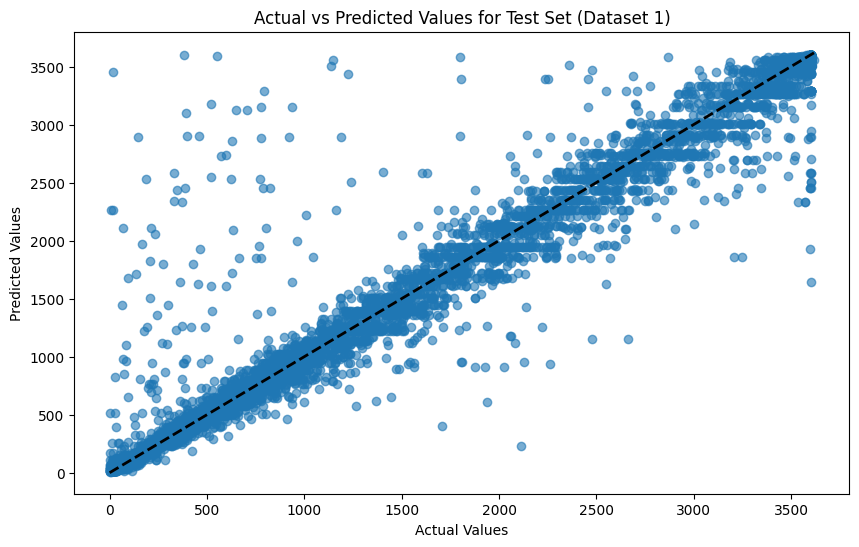

In [58]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted values for y_test and y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Test Set (Dataset 1)')
plt.show()

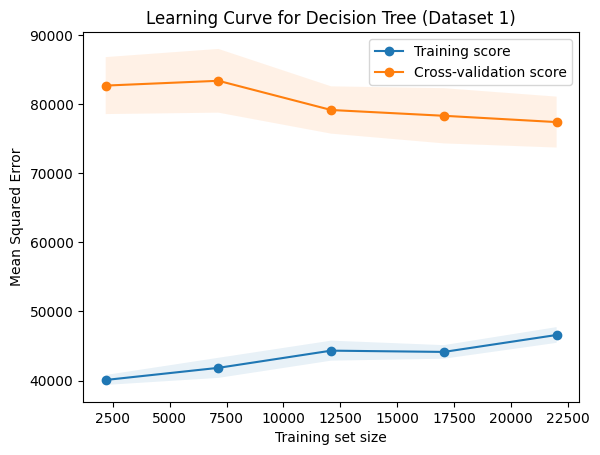

In [59]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_estimator, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for train and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, val_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for Decision Tree (Dataset 1)")
plt.legend()
plt.show()

## Perform Radial Basis Function Network (RFBN)

In [60]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LinearRegression

rbfn = make_pipeline(KMeans(n_init=10), BernoulliRBM(), LinearRegression())

# Define the parameter grid for each component
param_grid_dl = {
    'kmeans__n_clusters': [5, 10, 15],  # Adjust the number of clusters for KMeans
    'bernoullirbm__n_components': [5, 10, 15],  # Adjust the number of components for BernoulliRBM
    'linearregression__fit_intercept': [True, False],  # Adjust the fit_intercept hyperparameter
    'linearregression__n_jobs': [1, -1],  # Adjust the number of CPU cores used for computation
    'linearregression__positive': [True, False]  # Adjust the positive hyperparameter
}

grid_search_1 = GridSearchCV(rbfn, param_grid_dl, cv=5)



# Fit the RBFN to the training data
grid_search_1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_init=10)),
                                       ('bernoullirbm', BernoulliRBM()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'bernoullirbm__n_components': [5, 10, 15],
                         'kmeans__n_clusters': [5, 10, 15],
                         'linearregression__fit_intercept': [True, False],
                         'linearregression__n_jobs': [1, -1],
                         'linearregression__positive': [True, False]})

In [61]:
# Get the best estimator and best parameters from the grid search
best_estimator_1 = grid_search_1.best_estimator_
best_params_1 = grid_search_1.best_params_

y_val_pred = best_estimator_1.predict(x_val)
y_test_pred = best_estimator_1.predict(x_test)

In [62]:
print(f"Best Parameters: {best_params_1}")

print(f"RBFN Accuracy: {r2_score(y_test, y_test_pred)}")

mae_val_dl = mean_absolute_error(y_val, y_val_pred)
print("(Dataset 1) MAE on the validation set :", mae_val_dl)

mae_test_dl = mean_absolute_error(y_test, y_test_pred)
print("(Dataset 1) MAE on the test set :", mae_val_dl)

mse_val_dl = mean_squared_error(y_val, y_val_pred)
print("(Dataset 1) MSE on the validation set:", mse_val_dl)

mse_test_dl = mean_squared_error(y_test, y_test_pred)
print("(Dataset 1) MSE on the test set:", mse_test_dl)

rmse_val_dl = mean_squared_error(y_val, y_val_pred, squared=False)
print("(Dataset 1) RMSE on the validation set:", rmse_val_dl)

rmse_test_dl = mean_squared_error(y_test, y_test_pred, squared=False)
print("(Dataset 1) RMSE on the test set:", rmse_test_dl)

Best Parameters: {'bernoullirbm__n_components': 15, 'kmeans__n_clusters': 10, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': 1, 'linearregression__positive': False}
RBFN Accuracy: 0.9499952727782828
(Dataset 1) MAE on the validation set : 138.6224361059687
(Dataset 1) MAE on the test set : 138.6224361059687
(Dataset 1) MSE on the validation set: 75150.97992596653
(Dataset 1) MSE on the test set: 79728.19431367333
(Dataset 1) RMSE on the validation set: 274.1367905370721
(Dataset 1) RMSE on the test set: 282.3618145459356


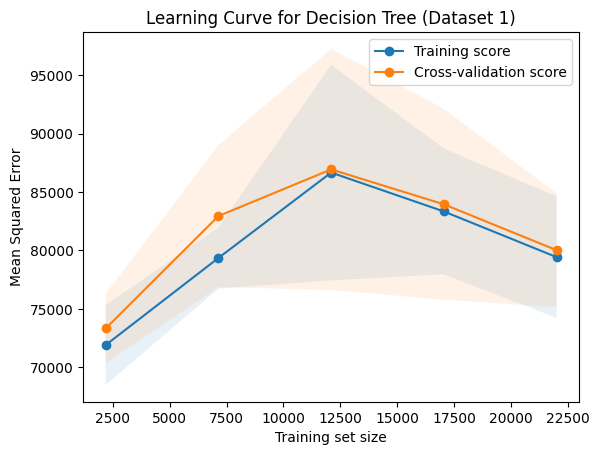

In [63]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_estimator_1, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for train and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, val_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for Decision Tree (Dataset 1)")
plt.legend()
plt.show()

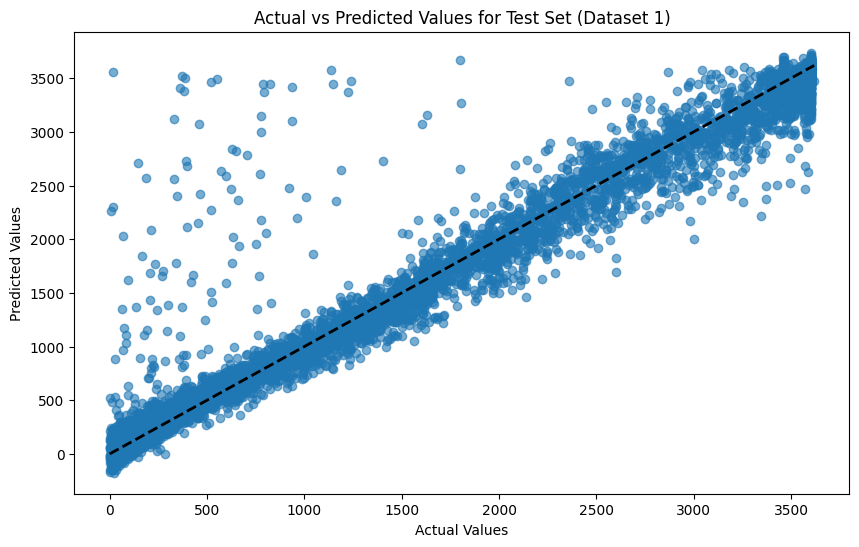

In [64]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted values for y_test and y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Test Set (Dataset 1)')
plt.show()

# Dataset 2 (TexasTurbine.csv)

In [65]:
df1 = pd.read_csv('/content/gdrive/Shareddrives/Computational Intelligence/TexasTurbine.csv')
print(df1.shape)
df1.head()

(8760, 6)


,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time stamp                     8760 non-null   object 
 1   System power generated | (kW)  8760 non-null   float64
 2   Wind speed | (m/s)             8760 non-null   float64
 3   Wind direction | (deg)         8760 non-null   int64  
 4   Pressure | (atm)               8760 non-null   float64
 5   Air temperature | ('C)         8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [67]:
print(df1.duplicated().sum(), df1.isnull().sum())

0 Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64


In [68]:
import datetime as dt

df1['Time stamp'] = pd.to_datetime(df1['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%b %d %H:%M:%S.%f')
# then use a lambda function to convert to datetime if it is a string else make is Not a Time
df1['Time stamp'] = df1['Time stamp'].apply(lambda x: dt.datetime.strptime(x,'%b %d %H:%M:%S.%f') if type(x)==str else pd.NaT)

df1["Month"]=df1["Time stamp"].dt.month
df1.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
0,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
2,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
3,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
4,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1


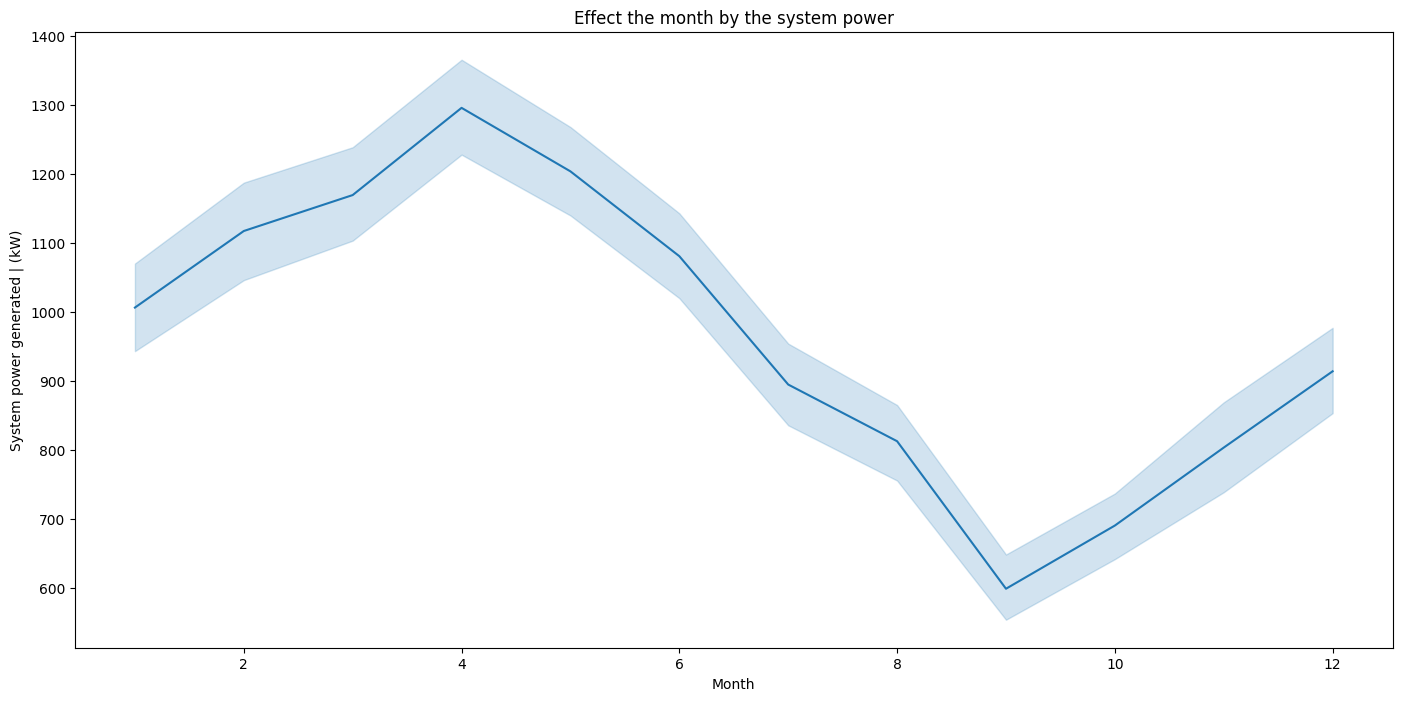

In [69]:
plt.figure(figsize=(17,8))
sns.lineplot(data=df1,x="Month",y="System power generated | (kW)",)
plt.title("Effect the month by the system power")
plt.show()

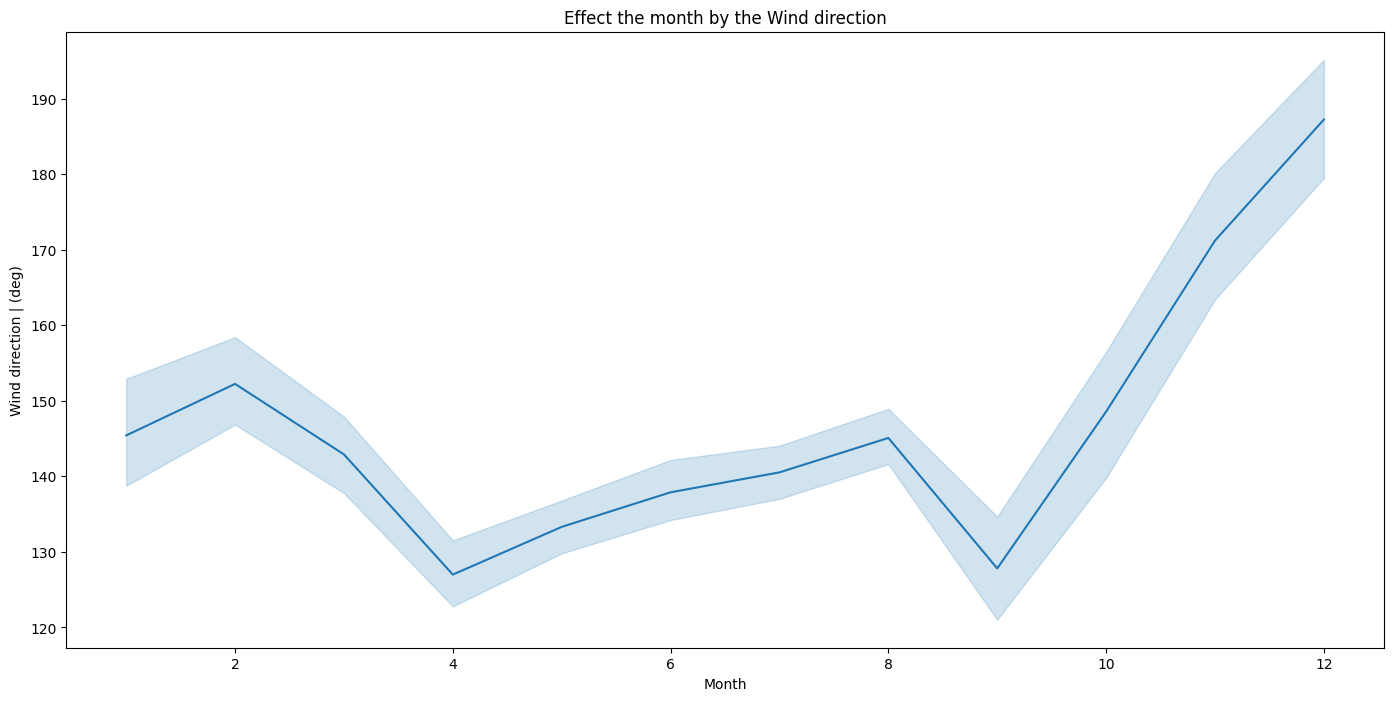

In [70]:
plt.figure(figsize=(17,8))
sns.lineplot(data=df1,x="Month",y="Wind direction | (deg)",)
plt.title("Effect the month by the Wind direction")
plt.show()

In [71]:
df1.set_index("Time stamp",inplace=True)

## Feature Extraction & Split 70, 15, 15

In [72]:
x1 = df1.drop(columns="System power generated | (kW)")
y1 = df1["System power generated | (kW)"]

x_train_d2, x_test_d2, y_train_d2, y_test_d2 = train_test_split(x1, y1, test_size=0.3, random_state=42)
x_val_d2, x_test_d2, y_val_d2, y_test_d2 = train_test_split(x_test_d2, y_test_d2, test_size=0.5, random_state=42)

print(x_train_d2.shape, x_test_d2.shape, x_val_d2.shape)

(6132, 5) (1314, 5) (1314, 5)


## Perform Decision Tree

In [73]:
dt_d2 = DecisionTreeRegressor()

grid_search_2 = GridSearchCV(dt_d2, param_grid_ml, cv=5)

grid_search_2.fit(x_train_d2, y_train_d2)

# Get the best estimator and best parameters from the grid search
best_estimator_2 = grid_search_2.best_estimator_
best_params_2 = grid_search_2.best_params_

y_pred_test_d2 = best_estimator_2.predict(x_test_d2)
y_pred_val_d2 = best_estimator_2.predict(x_val_d2)

print(f"Best Parameters: {best_params_2}")

print("Decision Tree Accuracy (Dataset 2):", r2_score(y_test_d2, y_pred_test_d2))

# Evaluate the model on the validation set
mae_val_d2 = mean_absolute_error(y_val_d2, y_pred_val_d2)
print("MAE on the validation set (Dataset 2):", mae_val_d2)

mae_test_d2 = mean_absolute_error(y_test_d2, y_pred_test_d2)
print("MAE on the test set (Dataset 2):", mae_test_d2)

mse_val_d2 = mean_squared_error(y_val_d2, y_pred_val_d2)
print("MSE on the validation set (Dataset 2):", mse_val_d2)

mse_test_d2 = mean_squared_error(y_test_d2, y_pred_test_d2)
print("MSE on the test set (Dataset 2):", mse_test_d2)

rmse_val_d2 = mean_squared_error(y_val_d2, y_pred_val_d2, squared=False)
print("RMSE on the validation set (Dataset 2):", rmse_val_d2)

rmse_test_d2 = mean_squared_error(y_test_d2, y_pred_test_d2, squared=False)
print("RMSE on the test set (Dataset 2):", rmse_test_d2)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy (Dataset 2): 0.9998731952977928
MAE on the validation set (Dataset 2): 5.460184614916283
MAE on the test set (Dataset 2): 5.770434204718418
MSE on the validation set (Dataset 2): 88.42479850319161
MSE on the test set (Dataset 2): 94.67953068804171
RMSE on the validation set (Dataset 2): 9.403446097213065
RMSE on the test set (Dataset 2): 9.730340728260327


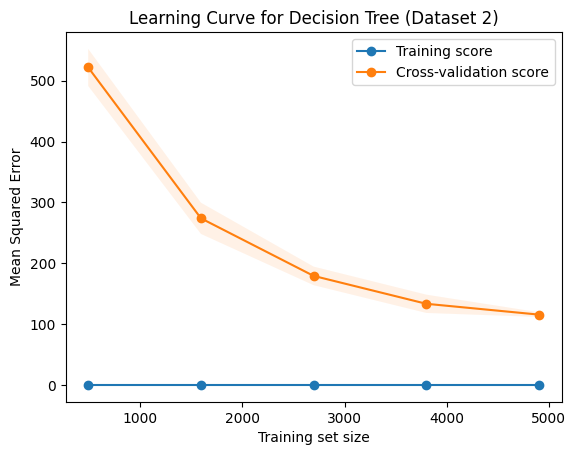

In [74]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(best_estimator_2, x_train_d2, y_train_d2, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for train and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, val_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for Decision Tree (Dataset 2)")
plt.legend()
plt.show()

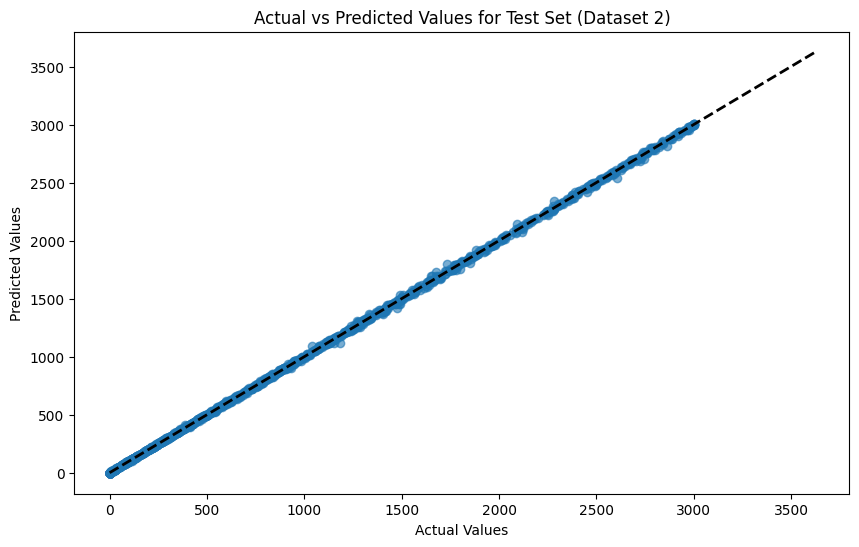

In [75]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted values for y_test and y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test_d2, y_pred_test_d2, alpha=0.6)
plt.plot([y_test_d2.min(), y_test.max()], [y_test_d2.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Test Set (Dataset 2)')
plt.show()

## Perform Radial Basis Function Network (RBFN)

In [76]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LinearRegression

# Create an RBFN pipeline
rbfn_d2 = make_pipeline(KMeans(n_init=10), BernoulliRBM(), LinearRegression())

grid_search_3 = GridSearchCV(rbfn_d2, param_grid_dl, cv=5)

# Fit the RBFN to the training data
grid_search_3.fit(x_train_d2, y_train_d2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_init=10)),
                                       ('bernoullirbm', BernoulliRBM()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'bernoullirbm__n_components': [5, 10, 15],
                         'kmeans__n_clusters': [5, 10, 15],
                         'linearregression__fit_intercept': [True, False],
                         'linearregression__n_jobs': [1, -1],
                         'linearregression__positive': [True, False]})

In [77]:
# Get the best estimator and best parameters from the grid search
best_estimator_3 = grid_search_3.best_estimator_
best_params_3 = grid_search_3.best_params_

y_val_pred_d2 = best_estimator_3.predict(x_val_d2)
y_test_pred_d2 = best_estimator_3.predict(x_test_d2)

In [78]:
print(f"Best Parameters: {best_params_3}")

print(f"(Dataset 2) RBFN Accuracy: {r2_score(y_test_d2, y_test_pred_d2)}")

mae_val_dl_d2 = mean_absolute_error(y_val_d2, y_val_pred_d2)
print("(Dataset 2) MAE on the validation set :", mae_val_dl_d2)

mae_test_dl_d2 = mean_absolute_error(y_test_d2, y_test_pred_d2)
print("(Dataset 2) MAE on the test set :", mae_test_dl_d2)

mse_val_dl_d2 = mean_squared_error(y_val_d2, y_val_pred_d2)
print("(Dataset 2) MSE on the validation set:", mse_val_dl_d2)

mse_test_dl_d2 = mean_squared_error(y_test_d2, y_test_pred_d2)
print("(Dataset 2) MSE on the test set:", mse_test_dl_d2)

rmse_val_dl_d2 = mean_squared_error(y_val_d2, y_val_pred_d2, squared=False)
print("(Dataset 2) RMSE on the validation set:", rmse_val_dl_d2)

rmse_test_dl_d2 = mean_squared_error(y_test_d2, y_test_pred_d2, squared=False)
print("(Dataset 2) RMSE on the test set:", rmse_test_dl_d2)

Best Parameters: {'bernoullirbm__n_components': 10, 'kmeans__n_clusters': 15, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': 1, 'linearregression__positive': False}
(Dataset 2) RBFN Accuracy: -9.439533522392907e-06
(Dataset 2) MAE on the validation set : 731.1472406370551
(Dataset 2) MAE on the test set : 724.9467995190071
(Dataset 2) MSE on the validation set: 746531.725885798
(Dataset 2) MSE on the test set: 746663.3553067062
(Dataset 2) RMSE on the validation set: 864.0206744550723
(Dataset 2) RMSE on the test set: 864.0968437083346


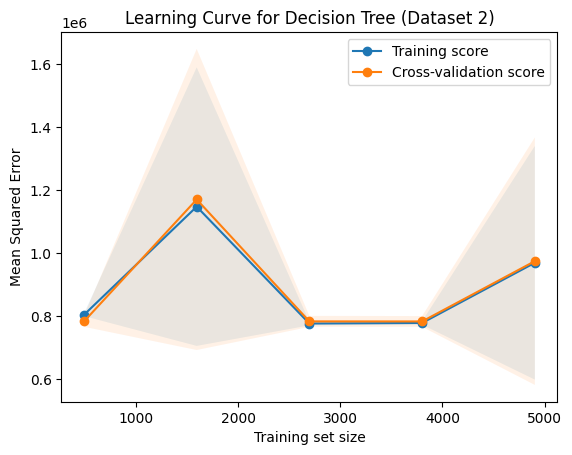

In [79]:
train_sizes, train_scores, val_scores = learning_curve(best_estimator_3, x_train_d2, y_train_d2, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for train and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, val_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for Decision Tree (Dataset 2)")
plt.legend()
plt.show()

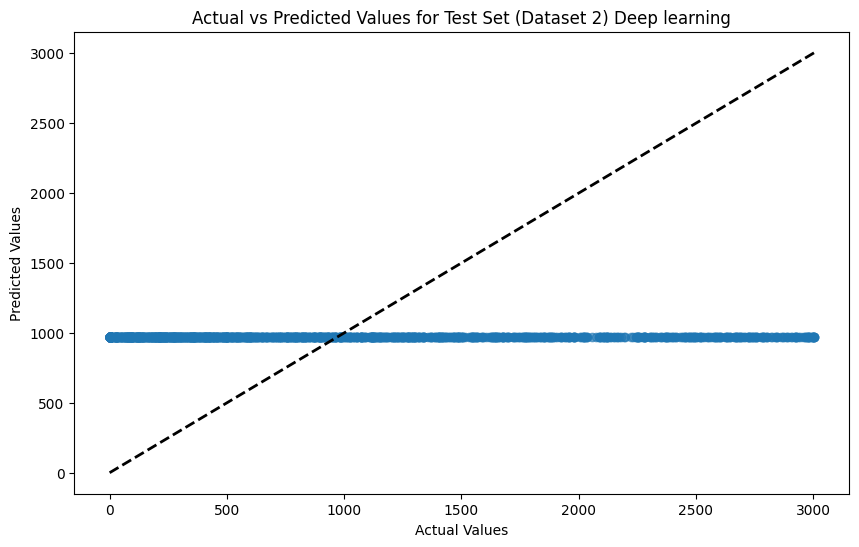

In [80]:

# Plotting Actual vs Predicted values for y_test and y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test_d2, y_test_pred_d2, alpha=0.6)
plt.plot([y_test_d2.min(), y_test_d2.max()], [y_test_d2.min(), y_test_d2.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Test Set (Dataset 2) Deep learning')
plt.show()